## Code to Combine Data Frames for 2017 P4K Reviews and Spotify Album Data

## Load DataFrames from CSVs

In [2]:
import pandas as pd

In [2]:
# Load in p4k 2017 data frame

p4k_reviews_fname = 'p4kreviews-2017-utf8sig.csv'

p4k_df_2017 = pd.read_csv(p4k_reviews_fname, index_col = 0)

p4k_df_2017.tail()

,album,artist,best,date,genre,review,score
1251,Harlequin,Alex Izenberg,0,December 7 2016,Pop/R&B,A modernist spin on the ’70s singer-songwriter...,6.3
1252,"“Awaken, My Love!”",Childish Gambino,0,December 6 2016,Rap,On Donald Glover’s latest project as Childish ...,7.2
1253,Zoovier,Fetty Wap,0,December 6 2016,Rap,Fetty Wap’s new tape doesn't quite answer the ...,6.4
1254,The Weight of These Wings,Miranda Lambert,0,December 6 2016,Folk/Country,Miranda Lambert’s double album arrives in the ...,7.8
1255,love and noir.,Denitia and Sene,0,December 6 2016,Pop/R&B,"This Brooklyn duo traffics in spare, low-lit R...",6.6


In [3]:
p4k_df_2017.shape

(1256, 7)

In [4]:
# Load in spotify album data for p4k 2017 reviews
sp_albums_fname = 'sp-p4k-2017-albums-final.csv'

sp_df_2017 = pd.read_csv(sp_albums_fname, index_col = 0)

sp_df_2017.tail()

,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,is_explicit
1058,spotify:album:7z7hGOK5ZvGQ2rCp9TyMHc,Happy Together,Mega Bog,0.433667,0.427000,0.640222,0.276448,0.194178,-7.255556,0.051867,130.842556,0.474711,5.777778,1638435,0
1059,spotify:album:7zJ6TVgvzdV9HPE8KA2a7R,Hate Songs EP,Suicideyear,0.179218,0.572333,0.693333,0.587800,0.188283,-6.030667,0.051333,136.975000,0.175767,9.500000,1548171,0
1060,spotify:album:7zg9ZSOQtYLjWnvSawflg6,Born Again,The Notorious B.I.G.,0.149571,0.692412,0.774824,0.003752,0.277141,-5.668000,0.342353,108.954882,0.635235,44.882353,4294841,17
1061,spotify:album:7zo4kiBFeJ6fTRJLTKo7XU,Belladonna of Sadness,Alexandra Savior,0.067121,0.522600,0.655200,0.002950,0.223940,-7.237900,0.040290,132.301900,0.595600,41.200000,2248784,1
1062,spotify:album:7zy6BF4J1cdLVZaPoTbLa7,All Blue,G Perico,0.163991,0.833727,0.639455,0.000000,0.196091,-6.956727,0.318091,115.320727,0.532545,22.181818,1774000,11


In [5]:
sp_df_2017[sp_df_2017.album == '“Awaken, My Love!”']

,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,is_explicit
591,spotify:album:4Carzsnpd6yvuHZ49I0oz8,"“Awaken, My Love!”",Childish Gambino,0.302384,0.609727,0.473273,0.142471,0.182145,-10.846545,0.118355,134.226636,0.486664,58.727273,2941863,3


In [6]:
sp_df_2017.shape

(1063, 15)

## Combine Data Frames

They share the same album names.

References: 

https://realpython.com/pandas-merge-join-and-concat/#pandas-join-combining-data-on-a-column-or-index

https://stackoverflow.com/questions/22720739/pandas-left-outer-join-results-in-table-larger-than-left-table

In [7]:
left_merged = pd.merge(sp_df_2017, p4k_df_2017,
                        how="left", left_on=["album", "album_artist"], right_on=["album", "artist"])
left_merged.head()
left_merged.shape

(1063, 21)

In [8]:
left_merged.tail()

,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,valence,popularity,duration_ms,is_explicit,artist,best,date,genre,review,score
1058,spotify:album:7z7hGOK5ZvGQ2rCp9TyMHc,Happy Together,Mega Bog,0.433667,0.427000,0.640222,0.276448,0.194178,-7.255556,0.051867,...,0.474711,5.777778,1638435,0,Mega Bog,0,February 6 2017,Experimental,Mega Bog is the malleable rock band mastermind...,7.4
1059,spotify:album:7zJ6TVgvzdV9HPE8KA2a7R,Hate Songs EP,Suicideyear,0.179218,0.572333,0.693333,0.587800,0.188283,-6.030667,0.051333,...,0.175767,9.500000,1548171,0,Suicideyear,0,July 28 2017,Electronic,Stepping away from his habitual trap beats and...,7.3
1060,spotify:album:7zg9ZSOQtYLjWnvSawflg6,Born Again,The Notorious B.I.G.,0.149571,0.692412,0.774824,0.003752,0.277141,-5.668000,0.342353,...,0.635235,44.882353,4294841,17,The Notorious B.I.G.,0,March 9 2017,Rap,The half-baked 1999 release Born Again reeks o...,6.0
1061,spotify:album:7zo4kiBFeJ6fTRJLTKo7XU,Belladonna of Sadness,Alexandra Savior,0.067121,0.522600,0.655200,0.002950,0.223940,-7.237900,0.040290,...,0.595600,41.200000,2248784,1,Alexandra Savior,0,April 19 2017,Pop/R&B,The young American singer launches her career ...,6.0
1062,spotify:album:7zy6BF4J1cdLVZaPoTbLa7,All Blue,G Perico,0.163991,0.833727,0.639455,0.000000,0.196091,-6.956727,0.318091,...,0.532545,22.181818,1774000,11,G Perico,0,May 5 2017,Rap,While nodding to West Coast legends of the ’90...,7.9


In [9]:
left_merged.head()

,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,valence,popularity,duration_ms,is_explicit,artist,best,date,genre,review,score
0,spotify:album:00LS6GJwb5ZPTKS8NMAT8x,Ultramega OK,Soundgarden,0.016674,0.355474,0.822842,0.276245,0.193763,-8.274474,0.063374,...,0.351063,23.526316,4224568,0,Soundgarden,0,March 20 2017,Rock,"Originally released in 1988 on SST, Soundgarde...",7.3
1,spotify:album:00MAXeszCotk3g9q8KYJlZ,Elastica,Elastica,0.013189,0.543429,0.798857,0.354580,0.141871,-5.612429,0.044371,...,0.665857,27.642857,2186449,1,Elastica,0,September 24 2017,Rock,"With its pithy, searing songs about sex, group...",8.5
2,spotify:album:00RnMn3ikeVB6gdOMZ3mwQ,No Mountains in Manhattan,Wiki,0.447740,0.596667,0.718933,0.000459,0.315007,-6.699600,0.373740,...,0.623067,18.400000,3191839,15,Wiki,0,August 30 2017,Rap,Wiki’s new album is an acidic and vivid manife...,8.1
3,spotify:album:02ER13KaisZo5CG2BydCWn,Americana,Ray Davies,0.458801,0.524933,0.449060,0.000951,0.189567,-12.199600,0.043220,...,0.450533,11.666667,3511114,0,Ray Davies,0,April 18 2017,Rock,The Kinks legend uses Americana to blaze a pat...,7.3
4,spotify:album:02Lx6I5EsUDFIdnS3pSNNT,Rosewood Almanac,Will Stratton,0.669300,0.478556,0.326333,0.045798,0.188511,-12.110556,0.034200,...,0.369111,7.666667,1775810,0,Will Stratton,0,May 22 2017,Folk/Country,"With pastoral folk roots, New York singer-song...",7.0


In [10]:
left_merged.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,is_explicit,best,score
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1.063000e+03,1063.000000,1063.000000,1063.000000
mean,0.306012,0.511355,0.595803,0.294525,0.195184,-9.428544,0.094428,119.718681,0.385848,23.707562,2.772106e+06,2.131703,0.069614,7.294826
std,0.248165,0.155436,0.182912,0.304877,0.089000,3.918838,0.081236,13.494383,0.170059,16.477378,1.508423e+06,4.757743,0.254616,0.933748
min,0.000005,0.064500,0.007474,0.000000,0.070900,-36.475647,0.026955,67.017500,0.018944,0.000000,1.804420e+05,0.000000,0.000000,2.800000
25%,0.113046,0.409227,0.476864,0.018979,0.137635,-11.279387,0.042185,112.064727,0.258054,9.401786,2.077870e+06,0.000000,0.000000,6.800000
50%,0.242832,0.521182,0.614154,0.173541,0.176350,-8.717857,0.059550,119.826684,0.388727,22.333333,2.510019e+06,0.000000,0.000000,7.400000
75%,0.447928,0.625188,0.727148,0.567618,0.227584,-6.602333,0.106281,128.034286,0.500333,35.333333,3.111877e+06,1.000000,0.000000,7.800000
max,0.993000,0.929000,0.985250,0.991750,0.867000,-2.089200,0.423533,193.244000,0.902071,75.200000,1.658408e+07,24.000000,1.000000,10.000000


## Save combined data to CSV

In [11]:
csv_save_filename = "sp-&-p4k_combined-2017-utf8sig-final.csv"
left_merged.to_csv(csv_save_filename, encoding="utf-8-sig")

## Load in this combined CSV 

In [3]:
# Load in p4k 2017 data frame

combined_reviews_fname = 'sp-&-p4k_combined-2017-utf8sig-final.csv'

sp_p4k_2017_df = pd.read_csv(combined_reviews_fname, index_col = 0)

sp_p4k_2017_df.tail()

,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,valence,popularity,duration_ms,is_explicit,artist,best,date,genre,review,score
1058,spotify:album:7z7hGOK5ZvGQ2rCp9TyMHc,Happy Together,Mega Bog,0.433667,0.427000,0.640222,0.276448,0.194178,-7.255556,0.051867,...,0.474711,5.777778,1638435,0,Mega Bog,0,February 6 2017,Experimental,Mega Bog is the malleable rock band mastermind...,7.4
1059,spotify:album:7zJ6TVgvzdV9HPE8KA2a7R,Hate Songs EP,Suicideyear,0.179218,0.572333,0.693333,0.587800,0.188283,-6.030667,0.051333,...,0.175767,9.500000,1548171,0,Suicideyear,0,July 28 2017,Electronic,Stepping away from his habitual trap beats and...,7.3
1060,spotify:album:7zg9ZSOQtYLjWnvSawflg6,Born Again,The Notorious B.I.G.,0.149571,0.692412,0.774824,0.003752,0.277141,-5.668000,0.342353,...,0.635235,44.882353,4294841,17,The Notorious B.I.G.,0,March 9 2017,Rap,The half-baked 1999 release Born Again reeks o...,6.0
1061,spotify:album:7zo4kiBFeJ6fTRJLTKo7XU,Belladonna of Sadness,Alexandra Savior,0.067121,0.522600,0.655200,0.002950,0.223940,-7.237900,0.040290,...,0.595600,41.200000,2248784,1,Alexandra Savior,0,April 19 2017,Pop/R&B,The young American singer launches her career ...,6.0
1062,spotify:album:7zy6BF4J1cdLVZaPoTbLa7,All Blue,G Perico,0.163991,0.833727,0.639455,0.000000,0.196091,-6.956727,0.318091,...,0.532545,22.181818,1774000,11,G Perico,0,May 5 2017,Rap,While nodding to West Coast legends of the ’90...,7.9


Text(0.5, 1, 'Correlation Matrix: All 2017 Pitchfork Albums on Spotify')

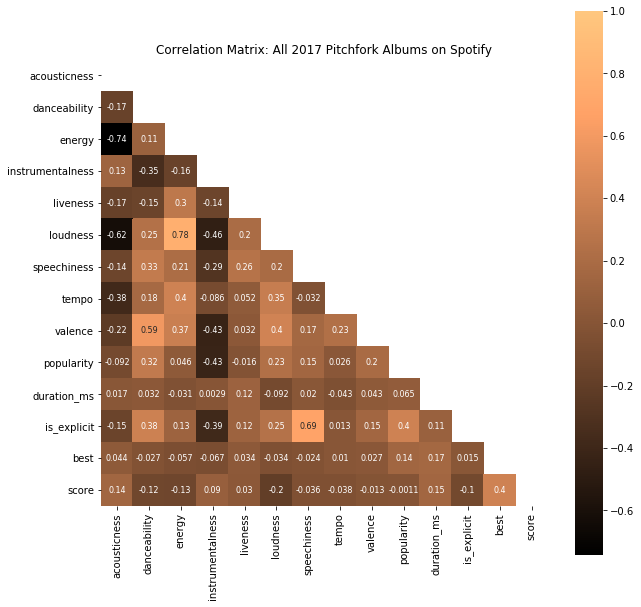

In [42]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def audioFeatureHeatmap(df):
    c = df.corr()

    fig, ax = plt.subplots(figsize=(10,10))  


    # make mask
    mask = np.ones_like(c, dtype = np.bool)
    mask = np.triu(mask)

    ax = sns.heatmap(c, annot = True, cmap = 'copper', mask = mask, square=True, annot_kws={"fontsize":8})

c = sp_p4k_2017_df.corr()

fig, ax = plt.subplots(figsize=(10,10))  


# make mask
mask = np.ones_like(c, dtype = np.bool)
mask = np.triu(mask)

ax = sns.heatmap(c, annot = True, cmap = 'copper', mask = mask, square=True, annot_kws={"fontsize":8})
ax.set_title('Correlation Matrix: All 2017 Pitchfork Albums on Spotify')


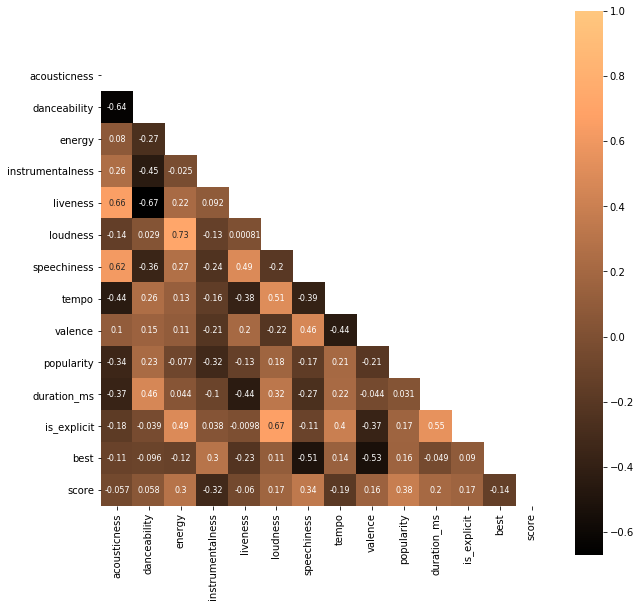

In [47]:
# plot heatmap for albums with above average scores

mean_score = sp_p4k_2017_df.score.mean()
mean_score

above_avg_albums_df = sp_p4k_2017_df[sp_p4k_2017_df.score > mean_score]
top_100_albums_df = sp_p4k_2017_df.sort_values('score', ascending = False).head(200)
audioFeatureHeatmap(top_100_albums_df[top_100_albums_df.genre == 'Rap'])


In [41]:
top_100_albums_df
top_100_albums_df.genre.value_counts()

Rock            40
Electronic      16
Pop/R&B         13
Rap             12
Metal            6
Jazz             4
Experimental     3
None             3
Folk/Country     2
Global           1
Name: genre, dtype: int64